In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

np.random.seed(47)
plt.style.use('dark_background')

In [2]:
fmri_dataset = sns.load_dataset('fmri')
fmri_dataset.sample(10, random_state=47)

,subject,timepoint,event,region,signal
449,s1,13,stim,frontal,-0.052714
891,s8,12,cue,parietal,-0.042112
173,s3,6,stim,parietal,0.340480
139,s0,9,stim,parietal,-0.035587
605,s13,5,cue,frontal,0.056731
680,s13,17,cue,frontal,-0.004190
499,s8,14,stim,frontal,-0.102198
807,s5,18,cue,parietal,0.037161
976,s4,3,cue,frontal,0.118515
245,s6,1,stim,parietal,-0.037326


### Pivot Table Explanation

A pivot table is a data transformation tool that reshapes a dataset by aggregating values based on specific row and column identifiers. It allows for easy comparison and summarization of data.

- **`index`**: Defines the rows of the resulting table.
- **`columns`**: Defines the columns of the resulting table.
- **`values`**: Specifies the data to be aggregated.
- **`aggfunc`**: Defines the aggregation function, such as `'mean'`, `'sum'`, etc. By default, it is `'mean'`.

For the given example:

- **`index='timepoint'`**: The rows represent unique timepoints in the fMRI scan.
- **`columns='event'`**: Separate columns are created for each event type (`stim` and `cue`).
- **`values='signal'`**: The `signal` values are aggregated.
- **`aggfunc='mean'`**: The average signal for each combination of `timepoint` and `event` is computed.

This structure allows for an easy comparison of the signal trends over time for each event type.


In [3]:
pivoted_fmri = fmri_dataset.pivot_table(
    index='timepoint', 
    columns='event', 
    values='signal',
    aggfunc='mean'
)

pivoted_fmri.sample(10)

event,cue,stim
timepoint,,
10,-0.043028,-0.064342
13,-0.008810,-0.078254
17,-0.004742,-0.037994
4,0.051290,0.145098
14,-0.004595,-0.062726
2,-0.010830,-0.014916
1,-0.021955,-0.028049
5,0.055489,0.219962
9,-0.052590,-0.011492


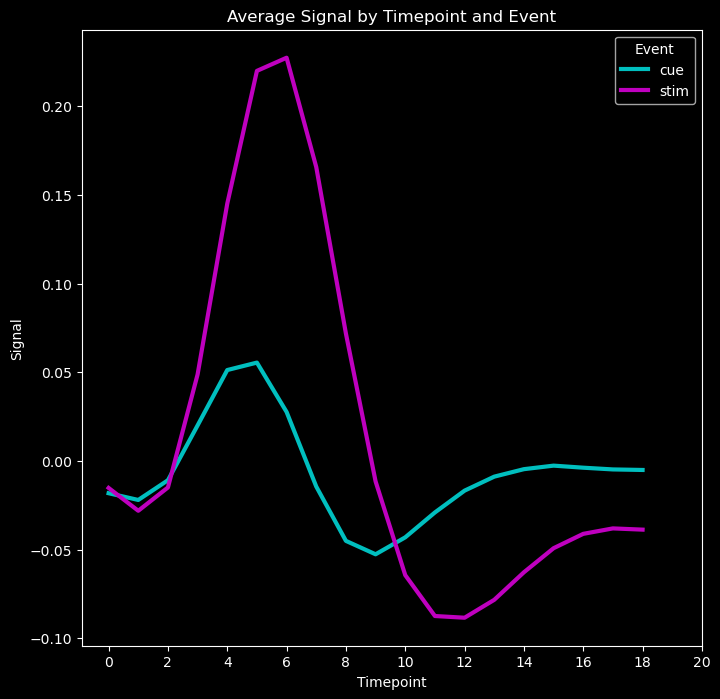

In [4]:
pivoted_fmri.plot(figsize=(8, 8), color=['c', 'm'], 
                  linewidth=3
)
plt.title('Average Signal by Timepoint and Event')
plt.ylabel('Signal')
plt.xlabel('Timepoint')
plt.xticks([*range(0, 21, 2)])
plt.legend(title='Event')
plt.show()